In [1]:
import pandas as pd

In [2]:
data = "data/feature selection_data.xlsx"
df = pd.read_excel(data)
df.head(5)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,label
0,-1.652102,3.705198,-0.439750,-0.344767,-0.762623,-0.427834,-3.918839,2.002947,-0.440326,3.109131,...,-3.918839,-0.762581,1.043777,-0.261567,3.705198,-0.808264,1.111339,1.774897,2.148513,1
1,1.290758,-1.765891,1.501238,0.417465,2.587909,1.191086,-0.409685,-0.818605,1.092107,-1.005671,...,-0.409685,-1.335862,0.724137,0.272421,-1.765891,-0.547905,2.228428,0.738561,1.602763,0
2,-0.862307,2.738942,0.429269,-1.716498,-0.586958,-0.521831,-1.730447,-0.911170,1.224639,1.967306,...,-1.730447,0.845407,0.535857,1.086863,2.738942,-0.383478,0.581966,-0.168025,1.287825,1
3,0.278205,0.094907,-0.431319,1.220476,0.155579,-0.747222,-0.328241,0.596009,-0.466108,0.266040,...,-0.328241,1.203213,-0.549554,0.938411,0.094907,-0.605656,1.051258,-0.026343,0.332179,1
4,-0.787551,-2.227869,1.433678,-0.423437,-0.469958,-0.737262,-0.763998,2.277689,1.819077,-2.073447,...,-0.763998,1.138911,-2.225935,1.004822,-2.227869,0.467575,1.247000,3.212568,2.726793,1


In [5]:
df.iloc[:5,:10]

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10
0,-1.652102,3.705198,-0.439750,-0.344767,-0.762623,-0.427834,-3.918839,2.002947,-0.440326,3.109131
1,1.290758,-1.765891,1.501238,0.417465,2.587909,1.191086,-0.409685,-0.818605,1.092107,-1.005671
2,-0.862307,2.738942,0.429269,-1.716498,-0.586958,-0.521831,-1.730447,-0.911170,1.224639,1.967306
3,0.278205,0.094907,-0.431319,1.220476,0.155579,-0.747222,-0.328241,0.596009,-0.466108,0.266040
4,-0.787551,-2.227869,1.433678,-0.423437,-0.469958,-0.737262,-0.763998,2.277689,1.819077,-2.073447


前提
見やすさのために2じげん


In [7]:
df.iloc[:5,10:]

,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,label
0,-1.339533,-3.918839,-0.762581,1.043777,-0.261567,3.705198,-0.808264,1.111339,1.774897,2.148513,1
1,1.432214,-0.409685,-1.335862,0.724137,0.272421,-1.765891,-0.547905,2.228428,0.738561,1.602763,0
2,-0.059893,-1.730447,0.845407,0.535857,1.086863,2.738942,-0.383478,0.581966,-0.168025,1.287825,1
3,-0.605921,-0.328241,1.203213,-0.549554,0.938411,0.094907,-0.605656,1.051258,-0.026343,0.332179,1
4,0.644365,-0.763998,1.138911,-2.225935,1.004822,-2.227869,0.467575,1.247000,3.212568,2.726793,1


### フィルター法

In [ ]:
import numpy as np

# 説明変数 (X) と目的変数 (y) を生成
X = df.iloc[:,:20]
y = df["label"]

# ピアソン相関係数を計算する関数
def calculate_high_correlations(X, y, threshold):
    correlations = X.corrwith(y)  # 説明変数と目的変数間の相関係数
    high_corr_features = correlations[correlations.abs() >= threshold]  # 閾値以上のものを選択

    # 絶対値が1に近い場合、一方を選択する処理
    redundant_features = set()
    for feature in high_corr_features.index:
        for other_feature in high_corr_features.index:
            if feature != other_feature and feature not in redundant_features:
                corr = X[feature].corr(X[other_feature])
                if abs(corr) >= 0.99:  # 閾値を調整可能 (ここでは0.99を使用)
                    redundant_features.add(other_feature)
    
    selected_features = set(high_corr_features.index) - redundant_features
    return high_corr_features, redundant_features, selected_features

# 閾値を設定して相関係数を計算
threshold = 0.6
high_corr_features, redundant_features, selected_features = calculate_high_correlations(X, y, threshold)

# 結果をデータフレームにまとめる
result_df = pd.DataFrame({
    "Feature": high_corr_features.index,
    "Correlation_with_Target": high_corr_features.values
}).sort_values(by="Correlation_with_Target", ascending=False)


#selected_features, redundant_features

result_df


,Feature,Correlation_with_Target
0,feature3,-0.679019
1,feature11,-0.790974


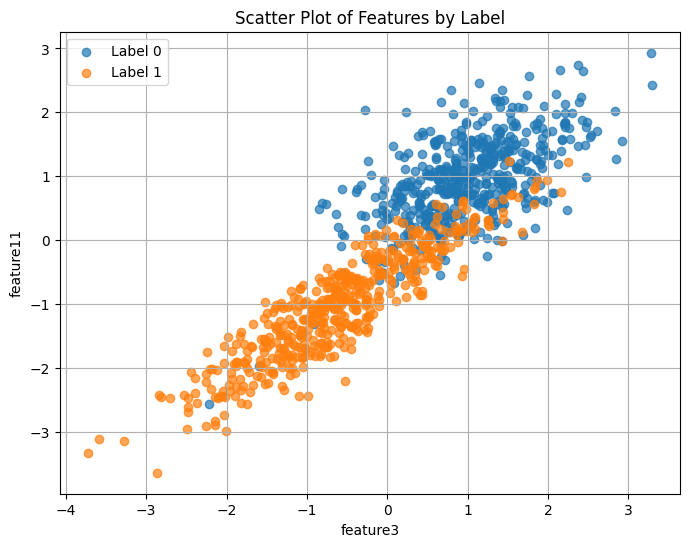

In [10]:
import matplotlib.pyplot as plt

# サンプルデータを作成
# ラベルを追加

X['label'] = df["label"]

# プロットする2つの特徴量を指定
feature_x = 'feature3'
feature_y = 'feature11'

# ラベルごとにプロット
plt.figure(figsize=(8, 6))
for label in np.unique(X['label']):
    subset = X[X['label'] == label]
    plt.scatter(subset[feature_x], subset[feature_y], label=f"Label {label}", alpha=0.7)

# グラフの設定
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("Scatter Plot of Features by Label")
plt.legend()
plt.grid(True)
plt.show()


### ラッパー法

削減後の特徴量数: (1000, 2)
選択された特徴量: Index(['feature16', 'feature20'], dtype='object')


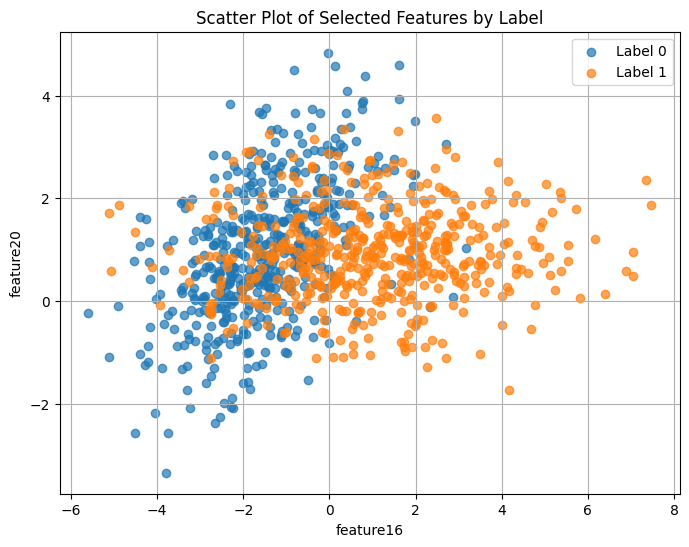

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

X = df.iloc[:, :-1]  # 説明変数
y = df["label"]  # 目的変数

# RFEを用いて特徴量選択
rfe = RFE(estimator=LinearRegression(), n_features_to_select=2)
rfe.fit(X, y)

# 削減後のデータを取得
rfeData = pd.DataFrame(rfe.transform(X), columns=[col for col, selected in zip(X.columns, rfe.support_) if selected])

# 削減後の特徴量を表示
print("削減後の特徴量数:", rfeData.shape)
print("選択された特徴量:", rfeData.columns)

# 削減後のデータにラベルを追加
rfeData['label'] = y

# プロットする2つの特徴量を指定
feature_x, feature_y = rfeData.columns[:2]  # 最初の2列を選択

# ラベルごとにプロット
plt.figure(figsize=(8, 6))
for label in np.unique(rfeData['label']):
    subset = rfeData[rfeData['label'] == label]
    plt.scatter(subset[feature_x], subset[feature_y], label=f"Label {label}", alpha=0.7)

# グラフの設定
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("Scatter Plot of Selected Features by Label")
plt.legend()
plt.grid(True)
plt.show()



### 組み込み法

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
feature_names = X.columns
# Lassoモデルの定義
lasso = Lasso(alpha=0.02)
# モデルのトレーニング
lasso.fit(X, y)
# 係数の取得
coefficients = lasso.coef_
# 係数の絶対値に基づく特徴量の重要性を取得
feature_importance = np.abs(coefficients)
# 重要性でソートされた特徴量のインデックスを取得 
sorted_index = np.argsort(feature_importance)[::-1]
# ソートされた特徴量の名前と重要性を出力 print("Feature importance sorted:")
for idx in sorted_index: print(f"{feature_names[idx]}: {feature_importance[idx]}")

X['label'] = df["label"]

# プロットする2つの特徴量を指定
feature_x = 'feature11'
feature_y = 'feature19'

# ラベルごとにプロット
plt.figure(figsize=(8, 6))
for label in np.unique(X['label']):
    subset = X[X['label'] == label]
    plt.scatter(subset[feature_x], subset[feature_y], label=f"Label {label}", alpha=0.7)

# グラフの設定
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("Scatter Plot of Features by Label")
plt.legend()
plt.grid(True)
plt.show()

feature11: 0.3412151570101474
feature19: 0.10363525557924158
feature20: 0.04308544331815182
feature7: 0.026925123597043073
feature18: 0.015234760138174994
feature8: 0.0
feature2: 0.0
feature3: 0.0
feature4: 0.0
feature5: 0.0
feature6: 0.0
feature10: 0.0
feature9: 0.0
feature12: 0.0
feature13: 0.0
feature14: 0.0
feature15: 0.0
feature16: 0.0
feature17: 0.0
feature1: 0.0


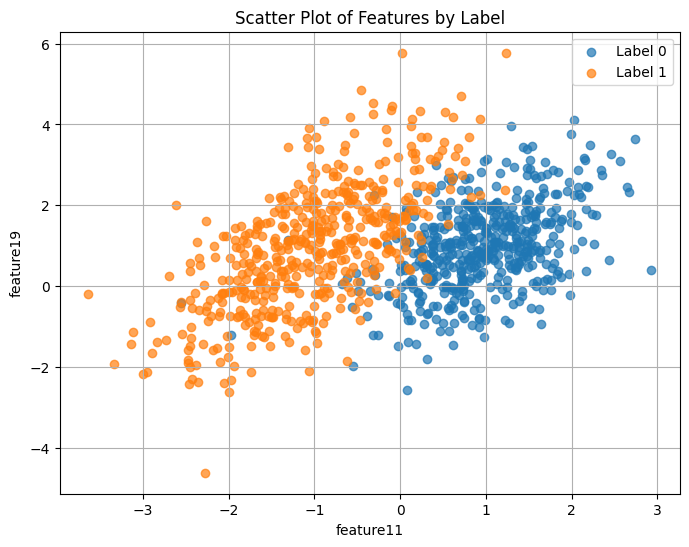

In [25]:
from sklearn.datasets import fetch_openml
import numpy as np

# MNISTデータセットをロード
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# ランダムに1000個のサンプルを選び出す
np.random.seed(28)  # 再現性のためのシード値
random_indices = np.random.choice(X.shape[0], 1000, replace=False)

# 選ばれたサンプル
X = X.iloc[random_indices]
column = X.columns
y = y.iloc[random_indices]

# 結果を確認
print("選ばれたサンプルの数:", X.shape[0])
print("選ばれたサンプルのラベルの数:", len(y.unique()))
X.head(5)


/Users/matsumoto-hirotomo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


選ばれたサンプルの数: 1000
選ばれたサンプルのラベルの数: 10


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
12892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Adjusted Rand Index (ARI): -0.00016865567333005385
Normalized Mutual Information (NMI): 0.017178296487841034


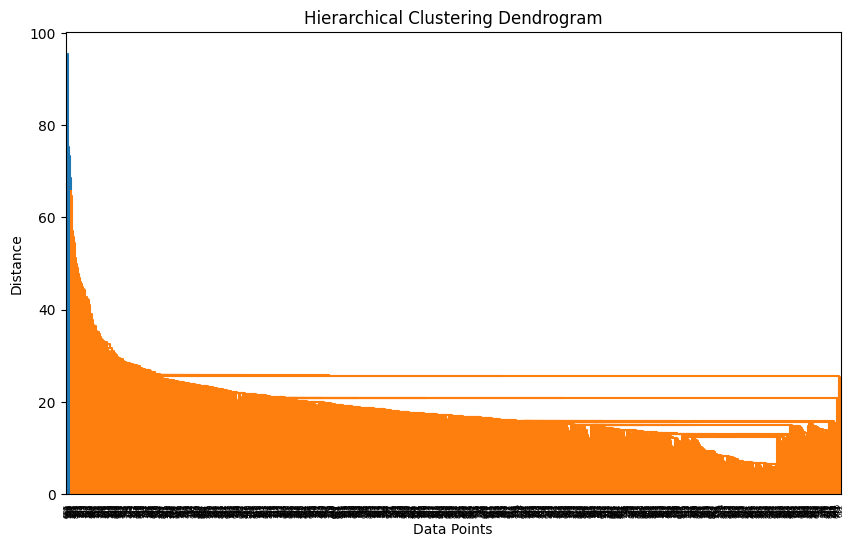

In [38]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# データ準備 (例として digits データを使用)
from sklearn.datasets import load_digits
digits = load_digits()
data = X
true_labels = y

# 標準化（階層型クラスタリングではスケールの影響が大きいため）
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 類似度（ユークリッド距離）を計算
similarity = pdist(data_scaled, metric='euclidean')

# クラスタ間の類似度（距離）情報を計算
linkage_matrix = linkage(similarity, method='single')

# クラスタリング結果を取得
num_clusters = 10  # クラスタ数を設定
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# 評価指標を計算
rand_index = adjusted_rand_score(true_labels, clusters)
nmi = normalized_mutual_info_score(true_labels, clusters)

# 結果を出力
print("Adjusted Rand Index (ARI):", rand_index)
print("Normalized Mutual Information (NMI):", nmi)

# デンドログラムの描画
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()



In [30]:
from sklearn.datasets import fetch_openml
import numpy as np

# MNISTデータセットをロード
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

# ランダムに1000個のサンプルを選び出す
np.random.seed(28)  # 再現性のためのシード値
random_indices = np.random.choice(X.shape[0], 1000, replace=False)

# 選ばれたサンプル
X = X.iloc[random_indices]
column = X.columns
y = y.iloc[random_indices]

# 結果を確認
print("選ばれたサンプルの数:", X.shape[0])
print("選ばれたサンプルのラベルの数:", len(y.unique()))
X.head(5)


/Users/matsumoto-hirotomo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


選ばれたサンプルの数: 1000
選ばれたサンプルのラベルの数: 10


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
12892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/Users/matsumoto-hirotomo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.240e+00, tolerance: 8.379e-01
  model = cd_fast.enet_coordinate_descent(
/var/folders/r2/q8_hcldj4f33gjgpcmt2s_yw0000gn/T/ipykernel_15265/57176149.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['label'] = y  # ラベルをデータに追加
/var/folders/r2/q8_hcldj4f33gjgpcmt2s_yw0000gn/T/ipykernel_15265/57176149.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

Feature importance sorted:
pixel139: 0.1356587418447236
pixel724: 0.13237578028685787
pixel67: 0.0700227905372349
pixel696: 0.06235905755782152
pixel335: 0.05835711382233168
pixel334: 0.057233703720641814
pixel146: 0.050301988499469735
pixel117: 0.049633864232454875
pixel668: 0.03028447948802333
pixel722: 0.03020650415377379
pixel145: 0.028940371645777247
pixel587: 0.027908898013134207
pixel306: 0.027407368749390044
pixel369: 0.02639489902727955
pixel195: 0.026365821684945532
pixel424: 0.02556157577771232
pixel642: 0.025450143591926235
pixel667: 0.025217975166109644
pixel66: 0.025157662785188578
pixel640: 0.02383574933244136
pixel564: 0.023606613866110165
pixel695: 0.022686468266477577
pixel284: 0.022662114037801922
pixel137: 0.02249298069790467
pixel279: 0.02244501137079254
pixel223: 0.0216046910954698
pixel772: 0.020967623992822624
pixel425: 0.020856774604146908
pixel69: 0.020381693467120477
pixel508: 0.019803837065395586
pixel251: 0.019715680663542106
pixel771: 0.0189990692923835
pi

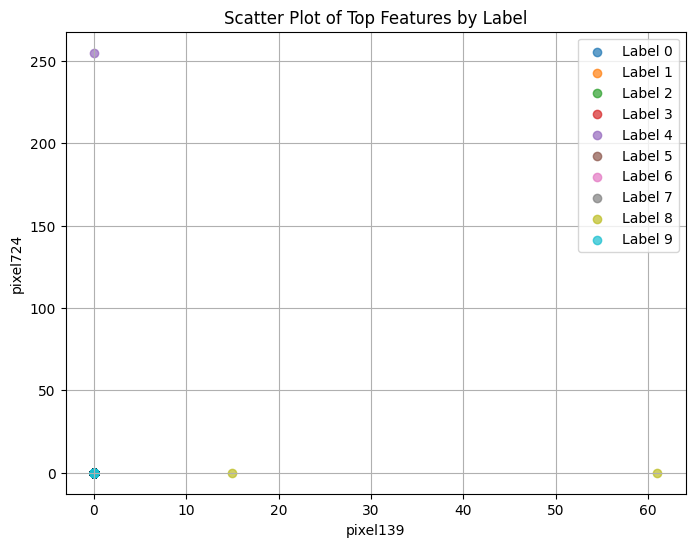

In [31]:
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

# Lassoモデルの定義
lasso = Lasso(alpha=0.02)

# モデルのトレーニング
lasso.fit(X, y)

# 係数の取得
coefficients = lasso.coef_

# 係数の絶対値に基づく特徴量の重要性を取得
feature_importance = np.abs(coefficients)

# 重要性でソートされた特徴量のインデックスを取得
sorted_index = np.argsort(feature_importance)[::-1]

# ソートされた特徴量の名前と重要性を出力
print("Feature importance sorted:")
for idx in sorted_index:
    print(f"{feature_names[idx]}: {feature_importance[idx]}")

# 重要度の高い2つの特徴量を取得
top_features = [feature_names[sorted_index[0]], feature_names[sorted_index[1]]]
feature_x, feature_y = top_features

# プロットの準備
X['label'] = y  # ラベルをデータに追加

plt.figure(figsize=(8, 6))
for label in np.unique(X['label']):
    subset = X[X['label'] == label]
    plt.scatter(subset[feature_x], subset[feature_y], label=f"Label {label}", alpha=0.7)

# グラフの設定
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("Scatter Plot of Top Features by Label")
plt.legend()
plt.grid(True)
plt.show()



In [34]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics.cluster import contingency_matrix

# NMIの計算
nmi_score = normalized_mutual_info_score(X['label'], lasso.predict(X.iloc[:,:-1]).round().astype(int))

# Purityの計算
def purity_score(y_true, y_pred):
    contingency = contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency, axis=0)) / np.sum(contingency)

# Lassoの予測値を整数ラベルに変換
predicted_labels = lasso.predict(X.iloc[:,:-1]).round().astype(int)
purity = purity_score(X['label'], predicted_labels)

# 結果の出力
print(f"NMI Score: {nmi_score}")
print(f"Purity: {purity}")

NMI Score: 0.39948226205466403
Purity: 0.423


/Users/matsumoto-hirotomo/.pyenv/versions/3.11.4/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.240e+00, tolerance: 8.379e-01
  model = cd_fast.enet_coordinate_descent(


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 12892    8
42085    5
24165    6
7445     7
69368    1
        ..
39498    0
13650    4
18445    4
58151    4
42454    2
Name: class, Length: 1000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

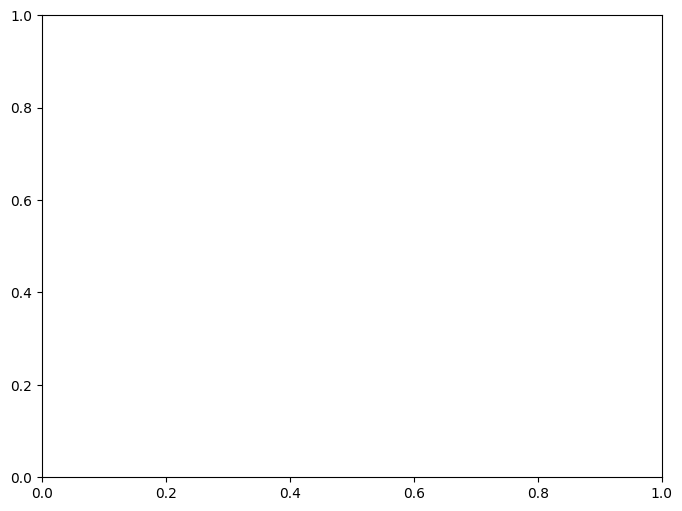

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.datasets import fetch_openml
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.linear_model import Lasso

# Function to calculate Purity
def purity_score(y_true, y_pred):
    contingency = contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency, axis=0)) / np.sum(contingency)

# Load MNIST data

X, y = X.iloc[:,:-1],y

# Feature selection using Lasso
lasso = Lasso(alpha=0.02)
lasso.fit(X, y)
coefficients = lasso.coef_
feature_importance = np.abs(coefficients)
sorted_index = np.argsort(feature_importance)[::-1]
top_features = [sorted_index[0], sorted_index[1]]

# Select the two most important features
X_selected = X.iloc[:, top_features].to_numpy()

# Apply Locally Linear Embedding
n_neighbors = 10
n_components = 2
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method='standard')
X_lle = lle.fit_transform(X_selected)

# Plot the LLE results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap=plt.cm.Spectral, alpha=0.7)
plt.title("Locally Linear Embedding (LLE)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(scatter)
plt.show()

# Calculate NMI
predicted_labels = np.round(X_lle[:, 0]).astype(int)  # Example clustering approach
nmi_score = normalized_mutual_info_score(y, predicted_labels)

# Calculate Purity
purity = purity_score(y, predicted_labels)

# Output results
print(f"NMI Score: {nmi_score}")
print(f"Purity: {purity}")



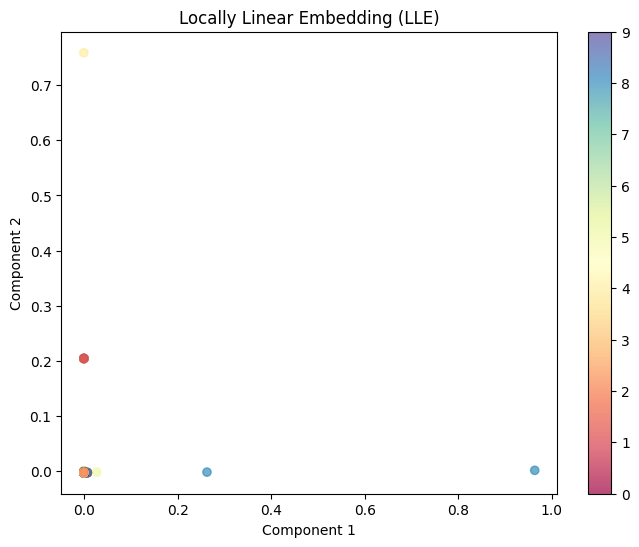

NMI Score: 0.0020945505342883056
Purity: 0.117


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.datasets import fetch_openml
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.linear_model import Lasso

# Function to calculate Purity
def purity_score(y_true, y_pred):
    contingency = contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency, axis=0)) / np.sum(contingency)

# Load MNIST data

X, y = X.iloc[:,:-1],y

# Feature selection using Lasso
lasso = Lasso(alpha=0.02, max_iter=10000)  # Increase max_iter for convergence
lasso.fit(X, y)
coefficients = lasso.coef_
feature_importance = np.abs(coefficients)
sorted_index = np.argsort(feature_importance)[::-1]
top_features = [sorted_index[0], sorted_index[1]]

# Select the two most important features
X_selected = X.iloc[:, top_features].to_numpy()

# Apply Locally Linear Embedding
n_neighbors = 10
n_components = 2
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method='standard')
X_lle = lle.fit_transform(X_selected)

# Convert y to numeric (integer) type for color mapping
y_numeric = y.astype(int)

# Plot the LLE results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_numeric, cmap=plt.cm.Spectral, alpha=0.7)
plt.title("Locally Linear Embedding (LLE)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(scatter)
plt.show()

# Calculate NMI
predicted_labels = np.round(X_lle[:, 0]).astype(int)  # Example clustering approach
nmi_score = normalized_mutual_info_score(y, predicted_labels)

# Calculate Purity
purity = purity_score(y, predicted_labels)

# Output results
print(f"NMI Score: {nmi_score}")
print(f"Purity: {purity}")
